In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [10]:
df=pd.read_csv("country_wise_latest.csv")

In [11]:
df


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [12]:
A = df.sort_values(by="Confirmed", ascending=False)
B = df.sort_values(by="Deaths", ascending=False)
C = df.sort_values(by="WHO Region", ascending=False)
A.head(10)
B.head(10)
C.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
164,Taiwan*,462,7,440,15,4,0,0,1.52,95.24,1.59,451,11,2.44,Western Pacific
105,Malaysia,8904,124,8601,179,7,0,1,1.39,96.60,1.44,8800,104,1.18,Western Pacific
59,Fiji,27,0,18,9,0,0,0,0.00,66.67,0.00,27,0,0.00,Western Pacific
121,New Zealand,1557,22,1514,21,1,0,1,1.41,97.24,1.45,1555,2,0.13,Western Pacific
150,Singapore,50838,27,45692,5119,469,0,171,0.05,89.88,0.06,48035,2803,5.84,Western Pacific
36,China,86783,4656,78869,3258,213,4,7,5.37,90.88,5.90,85622,1161,1.36,Western Pacific
155,South Korea,14203,300,13007,896,28,1,102,2.11,91.58,2.31,13816,387,2.80,Western Pacific
114,Mongolia,289,0,222,67,1,0,4,0.00,76.82,0.00,287,2,0.70,Western Pacific
30,Cambodia,226,0,147,79,1,0,4,0.00,65.04,0.00,171,55,32.16,Western Pacific
133,Philippines,82040,1945,26446,53649,1592,13,336,2.37,32.24,7.35,68898,13142,19.07,Western Pacific


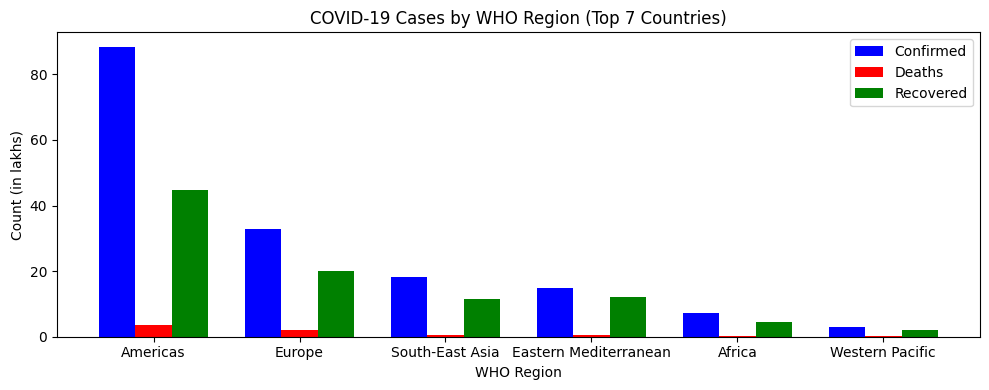

In [47]:
regions = df['WHO Region'].unique()
confirmed = df.groupby('WHO Region')['Confirmed'].sum().loc[regions]
deaths = df.groupby('WHO Region')['Deaths'].sum().loc[regions]
recovered = df.groupby('WHO Region')['Recovered'].sum().loc[regions]

top_countries = confirmed.nlargest(7).index

bar_width = 0.25
bar_positions = np.arange(len(top_countries))

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(bar_positions - bar_width, confirmed.loc[top_countries] / 1e5, width=bar_width, label='Confirmed', color='blue')
ax.bar(bar_positions, deaths.loc[top_countries] / 1e5, width=bar_width, label='Deaths', color='red')
ax.bar(bar_positions + bar_width, recovered.loc[top_countries] / 1e5, width=bar_width, label='Recovered', color='green')

ax.set_xlabel('WHO Region')
ax.set_ylabel('Count (in lakhs)')
ax.set_title('COVID-19 Cases by WHO Region (Top 7 Countries)')

ax.set_xticks(bar_positions)
ax.set_xticklabels(top_countries)

ax.legend()

plt.tight_layout()
plt.show()


In [13]:
I = df.sort_values(by="Confirmed", ascending=True)


In [14]:
I.tail(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas


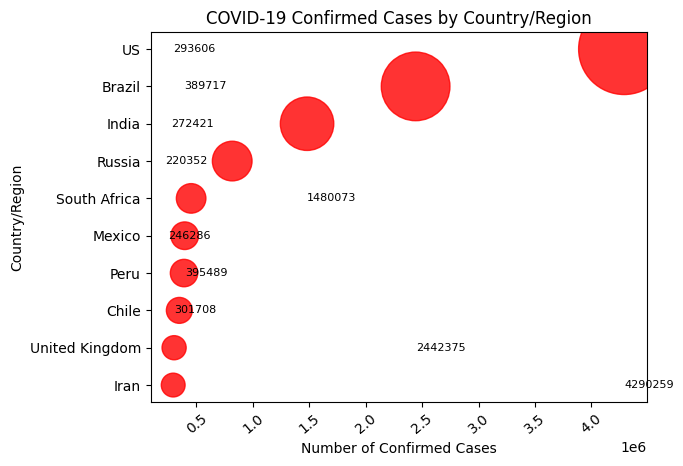

In [15]:



I = df.sort_values(by="Confirmed", ascending=True).tail(10)

#  bubble size
bubble_size = I['Confirmed'] * 0.001 

plt.scatter(I['Confirmed'], I['Country/Region'], s=bubble_size, c='red', alpha=0.8)

plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country/Region')
plt.title('COVID-19 Confirmed Cases by Country/Region')

plt.xticks(rotation=40)

for i, (confirmed, country) in enumerate(zip(B['Confirmed'], I['Country/Region'])):
    plt.text(confirmed, country, str(confirmed), ha='left', va='center', fontsize=8)

plt.show()



In [16]:
R = df.sort_values(by="Active", ascending=False)
L = df.sort_values(by="Country/Region", ascending=False)


In [31]:
R.head(10)
L.tail(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
178,Uruguay,1202,35,951,216,10,1,3,2.91,79.12,3.68,1064,138,12.97,Americas
179,Uzbekistan,21209,121,11674,9414,678,5,569,0.57,55.04,1.04,17149,4060,23.67,Europe
180,Venezuela,15988,146,9959,5883,525,4,213,0.91,62.29,1.47,12334,3654,29.63,Americas
181,Vietnam,431,0,365,66,11,0,0,0.00,84.69,0.00,384,47,12.24,Western Pacific
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


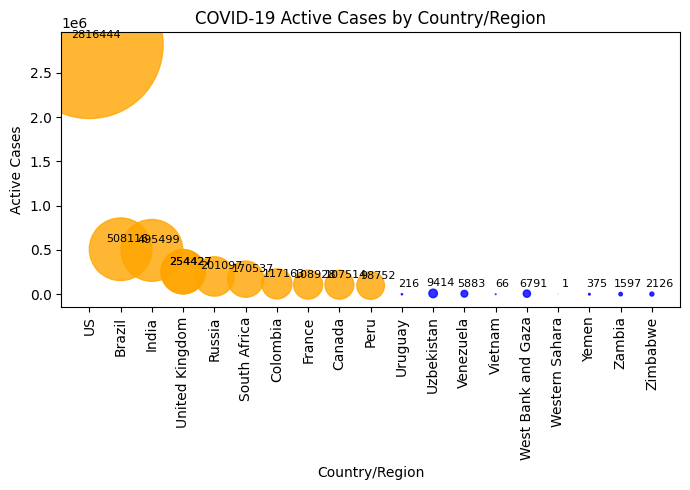

In [37]:
import matplotlib.pyplot as plt


R = df.sort_values(by="Active", ascending=False).head(10)
L = df.sort_values(by="Country/Region").tail(10)

combined_df = pd.concat([R, L])

bubble_size = combined_df['Active'] * 0.004
bubble_color = ['orange' if val in R['Active'].values else 'blue' for val in combined_df['Active']]

plt.figure(figsize=(7, 5))
plt.scatter(combined_df['Country/Region'], combined_df['Active'], s=bubble_size, c=bubble_color, alpha=0.8)
plt.xlabel('Country/Region')
plt.ylabel('Active Cases')
plt.title('COVID-19 Active Cases by Country/Region')

plt.xticks(rotation=90)

for i, row in combined_df.iterrows():
    plt.annotate(f"{row['Active']}", xy=(row['Country/Region'], row['Active']), xytext=(5, 5),
                 textcoords='offset points', fontsize=8, color='black', ha='center')

plt.tight_layout()
plt.show()


In [8]:
D=df.sort_values(by = "New recovered",ascending =False)

In [26]:
D.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
37,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,6.69,204005,53096,26.03,Americas
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
128,Pakistan,274289,5842,241026,27421,1176,20,3592,2.13,87.87,2.42,266096,8193,3.08,Eastern Mediterranean
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
145,Saudi Arabia,268934,2760,222936,43238,1993,27,2613,1.03,82.90,1.24,253349,15585,6.15,Eastern Mediterranean


Text(0.5, 1.0, 'New cases and new recovered')

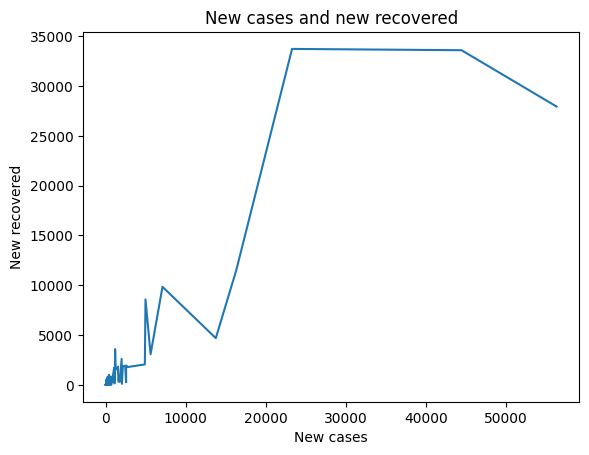

In [9]:

D = df.sort_values(by='New recovered', ascending=False)
ax = sns.lineplot(x='New cases', y='New recovered', data=D)
ax.set_xlabel('New cases')  
ax.set_ylabel('New recovered')


plt.title('New cases and new recovered')



In [10]:

E = df.sort_values(by='Active', ascending=False)

In [28]:
E.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
37,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,6.69,204005,53096,26.03,Americas
61,France,220352,30212,81212,108928,2551,17,267,13.71,36.86,37.20,214023,6329,2.96,Europe
32,Canada,116458,8944,0,107514,682,11,0,7.68,0.00,inf,112925,3533,3.13,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas


Text(0.5, 1.0, 'confirmed and Active cases')

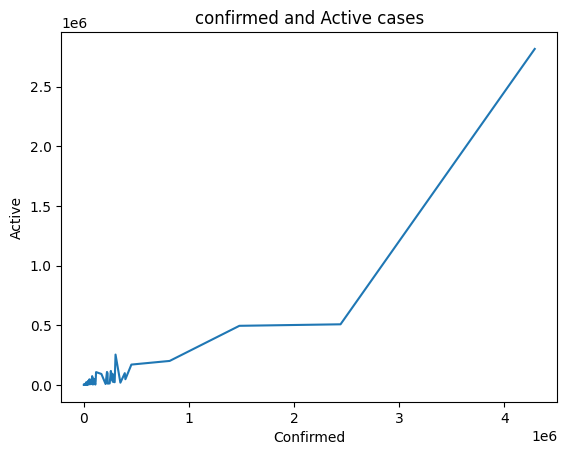

In [13]:

E = df.sort_values(by='Active', ascending=False)
ax = sns.lineplot(x='Confirmed', y='Active', data=E)
ax.set_xlabel('Confirmed')  
ax.set_ylabel('Active')

plt.title('confirmed and Active cases')

